### Python reference implementation of purchase/sale returns

* R - Reserve-Token Balance          (_reserveBalance) 
  * Number of Ether in balance
* S - BET Supply                     (_supply)
  * Number of Tokens in existence
* F - Fixed CRR                      (_reseveRatio)
  * The CRR ratio, ]0-100[. 
* E - reserve token paid/received    (_depositAmount)
  * The amount of reserve token (Ether) either received or paid
* T - BET amount paid/received       (_sellAmount) 
  * The amount of tokens either recie

The `calculatePurchaseReturn` is defined as 

    T = S * ((1 + E/R)^F - 1 )


In [1]:
import analysis as formula
import math

In [2]:
def generateTestData():
    S = 300000.0
    R = 63000.0
    F= 21

    print("module.exports.purchaseReturns= [")
    for i in range(1, 1000,2):
        E = float(i * i) # Goes up to 1 million ether 
        T = formula.calculatePurchaseReturn(S,R,F,E)
        print("\t[%d,%d,%d,%d,%d, %f]," % ( int(S), int(R), int(100*F), int(E),math.floor(T), T ))
    print("];")
    
    print("module.exports.saleReturns = [")
    for i in range(1, 1000,2):
        T = float(i * i) # Goes up to 1 million tokens
        print(S,R,F,T)
        E = formula.calculateSaleReturn(S,R,F,T)
        print("\t[%d,%d,%d,%d,%d, %f]," % ( int(S), int(R), int(100*F), int(T),math.floor(E), E ))
    print("];")

generateTestData()

module.exports.purchaseReturns= [
	[300000,63000,2100,1,0, 0.999994],
	[300000,63000,2100,9,8, 8.999492],
	[300000,63000,2100,25,24, 24.996082],
	[300000,63000,2100,49,48, 48.984953],
	[300000,63000,2100,81,80, 80.958895],
	[300000,63000,2100,121,120, 120.908308],
	[300000,63000,2100,169,168, 168.821213],
	[300000,63000,2100,225,224, 224.683264],
	[300000,63000,2100,289,288, 288.477765],
	[300000,63000,2100,361,360, 360.185691],
	[300000,63000,2100,441,439, 439.785703],
	[300000,63000,2100,529,527, 527.254181],
	[300000,63000,2100,625,622, 622.565241],
	[300000,63000,2100,729,725, 725.690771],
	[300000,63000,2100,841,836, 836.600456],
	[300000,63000,2100,961,955, 955.261816],
	[300000,63000,2100,1089,1081, 1081.640240],
	[300000,63000,2100,1225,1215, 1215.699019],
	[300000,63000,2100,1369,1357, 1357.399392],
	[300000,63000,2100,1521,1506, 1506.700583],
	[300000,63000,2100,1681,1663, 1663.559848],
	[300000,63000,2100,1849,1827, 1827.932512],
	[300000,63000,2100,2025,1999, 1999.772026],


In [3]:
[S,R,F,T] = [2501391,725403,28,241459]
def compareSale(S,R,F,T):    
    try:
        E = formula.calculateSaleReturnSolidity(S,R,F,T)
        E_correct = formula.calculateSaleReturn(S,R,F,T)
        if E > E_correct:
            print("Sale returned more Ether than there should be: ")
            print(" [S,R,F,T] = %s" % [S,R,F,T])
            print(" Correct value : %f " % E_correct)
            print(" Returned value: %f " % E)
    except Exception:
        pass
    
def comparePurchase(S,R,F,E):
    try:
        T = formula.calculatePurchaseReturnSolidity(S,R,F,E)
        T_correct = formula.calculatePurchaseReturn(S,R,F,E)
        if T > T_correct:
            print("ALERT! Purchase returned more tokens than there should be: ")
            print(" [S,R,F,E] = %s" % [S,R,F,E])
            print(" Correct value : %f " % T_correct)
            print(" Returned value: %f " % T)
    except Exception:
        pass

compareSale(S,R,F,T)

for F in range(80,90):
    [S,R,F,E] = [300000.0, 63000.0, F, 10000000000.0]
    comparePurchase(S,R,F,E)


 supply[300000] * resN[62156937750730] / resD[4294967296] - supply[300000] = 4341311947 
 supply[300000] * resN[70064210387033] / resD[4294967296] - supply[300000] = 4893628560 
 supply[300000] * resN[78977403880454] / resD[4294967296] - supply[300000] = 5516207933 
 supply[300000] * resN[89024486089720] / resD[4294967296] - supply[300000] = 6217988519 
 supply[300000] * resN[100349704256161] / resD[4294967296] - supply[300000] = 7009045869 
 supply[300000] * resN[113115655979793] / resD[4294967296] - supply[300000] = 7900737296 
 supply[300000] * resN[127505623652613] / resD[4294967296] - supply[300000] = 8905864927 
 supply[300000] * resN[143726205863437] / resD[4294967296] - supply[300000] = 10038859506 
 supply[300000] * resN[162010283558699] / resD[4294967296] - supply[300000] = 11315987579 
 supply[300000] * resN[182620363539470] / resD[4294967296] - supply[300000] = 12755585036 


 supply[300000] * resN[4294967296] / resD[4294967296] - supply[300000] = 0 
 supply[300000] * resN[4431209085] / resD[4294967296] - supply[300000] = 9516 
 supply[300000] * resN[4553301795] / resD[4294967296] - supply[300000] = 18044 
 supply[300000] * resN[4664192039] / resD[4294967296] - supply[300000] = 25790 
 supply[300000] * resN[4765968712] / resD[4294967296] - supply[300000] = 32899 
 supply[300000] * resN[4860170379] / resD[4294967296] - supply[300000] = 39478 
 supply[300000] * resN[4947965374] / resD[4294967296] - supply[300000] = 45611 
 supply[300000] * resN[5030263278] / resD[4294967296] - supply[300000] = 51359 
 supply[300000] * resN[5107787083] / resD[4294967296] - supply[300000] = 56774 
 supply[300000] * resN[5181121647] / resD[4294967296] - supply[300000] = 61897 
 supply[300000] * resN[5250747264] / resD[4294967296] - supply[300000] = 66760 
 supply[300000] * resN[5317063534] / resD[4294967296] - supply[300000] = 71392 
 supply[300000] * resN[5380406745] / resD[429

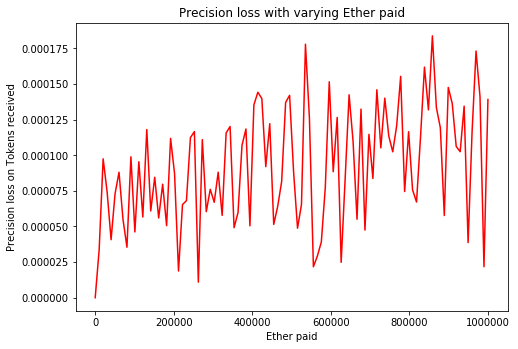

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def getPoints(start, stop,S,R,F,E):    
    _y = []
    _x = []
    steps = 100

    def diff_S(x):
        return formula.calculatePurchaseReturn(x,R,F,E)- formula.calculatePurchaseReturnSolidity(x,R,F,E)
    def diff_R(x):
        return formula.calculatePurchaseReturn(S,x,F,E)- formula.calculatePurchaseReturnSolidity(S,x,F,E)
    def diff_F(x):
        R = int(x * S / 100) 
        delta =  int(formula.calculatePurchaseReturn(S,R,x,E))- int(formula.calculatePurchaseReturnSolidity(S,R,x,E))
        if delta < 0:
            print("Delta below 0")
            print("[S,R,F,E]= %s" % [S,R,x,E])
            print("calculatePurchaseReturn(S,R,F,E)= %f" % (formula.calculatePurchaseReturn(S,R,x,E)))
            print("calculatePurchaseReturnSolidity(S,R,F,E)= %f" % (formula.calculatePurchaseReturnSolidity(S,R,x,E)))
        return delta
    def diff_E(x):
        return formula.calculatePurchaseReturn(S,R,F,x)- formula.calculatePurchaseReturnSolidity(S,R,F,x)
    
    diff = diff_S 
    if S is None:
        diff = diff_S
    elif R is None:
        diff = diff_R
    elif F is None:
        diff = diff_F
    elif E is None:
        diff = diff_E
    
    for x in np.linspace(start = start, stop = stop, num=steps):
        x = int(x)
        try:
            _y.append(diff(x))
            _x.append(x)        
        except Exception:
            pass
    return (_x,_y)

S = 300000.0
R = 63000.0
F= 21
E = None

(x,y) = getPoints(0,1000000,S,R,F,E)

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.plot(x, y, 'r')
axes.set_xlabel('Ether paid')
axes.set_ylabel('Precision loss on Tokens received')
axes.set_title('Precision loss with varying Ether paid');



 supply[300000] * resN[53100537897] / resD[4294967296] - supply[300000] = 3409029 
 supply[3327272] * resN[53100537897] / resD[4294967296] - supply[3327272] = 37809230 
 supply[6354545] * resN[53100537897] / resD[4294967296] - supply[6354545] = 72209442 
 supply[9381818] * resN[53100537897] / resD[4294967296] - supply[9381818] = 106609654 
 supply[12409090] * resN[53100537897] / resD[4294967296] - supply[12409090] = 141009855 
 supply[15436363] * resN[53100537897] / resD[4294967296] - supply[15436363] = 175410067 
 supply[18463636] * resN[53100537897] / resD[4294967296] - supply[18463636] = 209810279 
 supply[21490909] * resN[53100537897] / resD[4294967296] - supply[21490909] = 244210492 
 supply[24518181] * resN[53100537897] / resD[4294967296] - supply[24518181] = 278610692 
 supply[27545454] * resN[53100537897] / resD[4294967296] - supply[27545454] = 313010904 
 supply[30572727] * resN[53100537897] / resD[4294967296] - supply[30572727] = 347411117 
 supply[33600000] * resN[5310053789

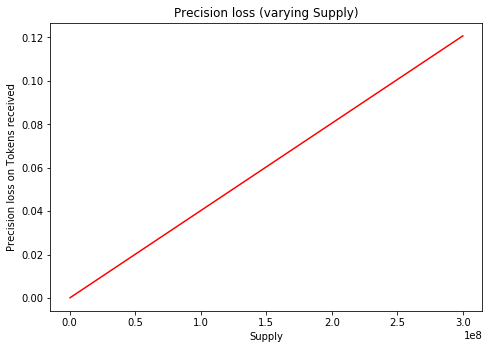

In [5]:
S = None
R = 63000.0
F= 21
E = 1e10

y = []
x = []

(x,y) = getPoints(300000,300000000,S,R,F,E)

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.plot(x, y, 'r')
axes.set_xlabel('Supply')
axes.set_ylabel('Precision loss on Tokens received')
axes.set_title('Precision loss (varying Supply)');

 supply[300000] * resN[4991012412] / resD[4294967296] - supply[300000] = 48618 
 supply[300000] * resN[5720010701] / resD[4294967296] - supply[300000] = 99538 
 supply[300000] * resN[6521276245] / resD[4294967296] - supply[300000] = 155505 
 supply[300000] * resN[7409563634] / resD[4294967296] - supply[300000] = 217552 
 supply[300000] * resN[8397602835] / resD[4294967296] - supply[300000] = 286565 
 supply[300000] * resN[9498249158] / resD[4294967296] - supply[300000] = 363445 
 supply[300000] * resN[10725179622] / resD[4294967296] - supply[300000] = 449145 
 supply[300000] * resN[12093250394] / resD[4294967296] - supply[300000] = 544703 
 supply[300000] * resN[13618749383] / resD[4294967296] - supply[300000] = 651258 
 supply[300000] * resN[15319615524] / resD[4294967296] - supply[300000] = 770062 
 supply[300000] * resN[17215652406] / resD[4294967296] - supply[300000] = 902499 
 supply[300000] * resN[19328749102] / resD[4294967296] - supply[300000] = 1050097 
 supply[300000] * resN[

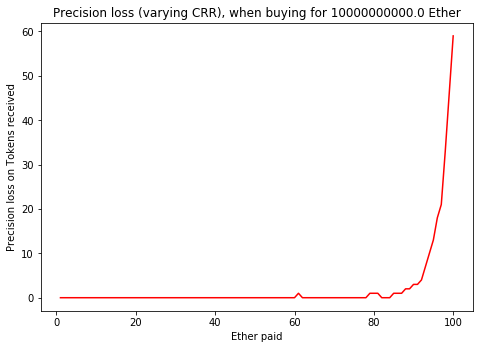

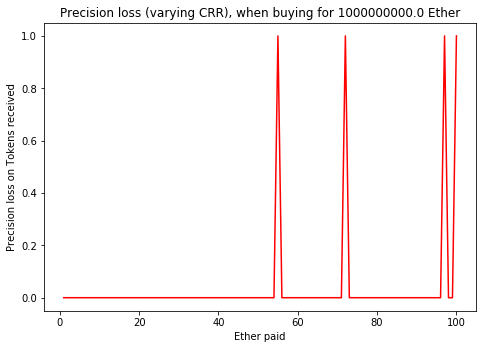

In [6]:
S = 300000.0
R = 63000.0
F= None
E = 1e10

(x,y) = getPoints(1,100,S,R,F,E)

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.plot(x, y, 'r')
axes.set_xlabel('Ether paid')
axes.set_ylabel('Precision loss on Tokens received')
axes.set_title('Precision loss (varying CRR), when buying for %s Ether' % E);

S = 300000.0
R = 63000.0
F= None
E = 1e9

(x,y) = getPoints(1,100,S,R,F,E)

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.plot(x, y, 'r')
axes.set_xlabel('Ether paid')
axes.set_ylabel('Precision loss on Tokens received')
axes.set_title('Precision loss (varying CRR)');
axes.set_title('Precision loss (varying CRR), when buying for %s Ether' % E);


In [7]:
def generateTestDataForErrorCases():
    S = 300000.0
    R = 63000.0
    F= None
    E = 1e9
    
    print("module.exports.purchaseReturnsErrors = [")
    for i in range(1, 100,1):
        F = i
        R = int(F * S / 100)
        try:
            T = formula.calculatePurchaseReturn(S,R,F,E)
            T_sol = formula.calculatePurchaseReturnSolidity(S,R,F,E)
            
            if T_sol > T:
                print("\t[%d,%d,%d,%d,%d, %f]," % ( int(S), int(R), int(F), int(E),math.floor(T), T ))
        except Exception:
            print("\t[%d,%d,%d,%d,%d, %f]//Exception," % ( int(S), int(R), int(F), int(E),math.floor(T), T ))
            
            
    print("];")


generateTestDataForErrorCases()

module.exports.purchaseReturnsErrors = [
 supply[300000] * resN[4877403230] / resD[4294967296] - supply[300000] = 40682 
 supply[300000] * resN[5462568402] / resD[4294967296] - supply[300000] = 81555 
 supply[300000] * resN[6086010582] / resD[4294967296] - supply[300000] = 125102 
 supply[300000] * resN[6757605268] / resD[4294967296] - supply[300000] = 172013 
 supply[300000] * resN[7484376455] / resD[4294967296] - supply[300000] = 222777 
 supply[300000] * resN[8272637224] / resD[4294967296] - supply[300000] = 277837 
 supply[300000] * resN[9128620421] / resD[4294967296] - supply[300000] = 337626 
 supply[300000] * resN[10058744934] / resD[4294967296] - supply[300000] = 402595 
 supply[300000] * resN[11069759298] / resD[4294967296] - supply[300000] = 473213 
 supply[300000] * resN[12168836013] / resD[4294967296] - supply[300000] = 549983 
 supply[300000] * resN[13363644201] / resD[4294967296] - supply[300000] = 633439 
 supply[300000] * resN[14662412628] / resD[4294967296] - supply[30

In [8]:
testCornercase2(10e18)

NameError: name 'testCornercase2' is not defined

In [11]:
import random, math
def generateRandomTestData2():
    print("module.exports.randomPurchaseReturns2 = [")
    for i in range(1, 10000):
        S = float(random.randint(1, 3e18))
        F = random.randint(1, 100 )
        R = math.floor(F*S / 100)
        E = float(random.randint(700, 300000))
        T = formula.calculatePurchaseReturn(int(S),int(R),F,int(E))
        T_S = formula.calculatePurchaseReturnSolidity(int(S),int(R),F,int(E))
        if math.floor(T) < math.floor(T_S):
            print("\t[%d,%d,%d,%d,%d, %f], # %d" % ( int(S), int(R), int(F), int(E),math.floor(T), T, T_S ))
        
    print("];")



    print("module.exports.randomSaleReturns2 = [")
    for i in range(1, 10000):
        S = float(random.randint(1, 3e18))
        F = random.randint(1, 100 )
        R = math.floor(F*S / 100)
        T = float(random.randint(700, 300000))
        E = formula.calculateSaleReturn(int(S),int(R),float(F),int(T))
        E_S = formula.calculateSaleReturnSolidity(int(S),int(R),float(F),int(T))
        if math.floor(E) < math.floor(E_S):
            print("\t[%d,%d,%d,%d,%d, %f], # %d" % ( int(S), int(R), int(F), int(T),math.floor(E), E ,E_S))

    print("];")
generateRandomTestData2()
print("#Done")

module.exports.randomPurchaseReturns2 = [
 supply[1183221064210502656] * resN[4294967296] / resD[4294967296] - supply[1183221064210502656] = 0 
 supply[957033875211972992] * resN[4294967296] / resD[4294967296] - supply[957033875211972992] = 0 
 supply[1972727572521419776] * resN[4294967296] / resD[4294967296] - supply[1972727572521419776] = 0 
 supply[1803785857848713984] * resN[4294967296] / resD[4294967296] - supply[1803785857848713984] = 0 
 supply[1730815453891667200] * resN[4294967296] / resD[4294967296] - supply[1730815453891667200] = 0 
 supply[2464823190190319104] * resN[4294967296] / resD[4294967296] - supply[2464823190190319104] = 0 
 supply[2490770150759977472] * resN[4294967296] / resD[4294967296] - supply[2490770150759977472] = 0 
 supply[189500990892945760] * resN[4294967296] / resD[4294967296] - supply[189500990892945760] = 0 
 supply[2503946021016187904] * resN[4294967296] / resD[4294967296] - supply[2503946021016187904] = 0 
 supply[366900135363041216] * resN[429496729

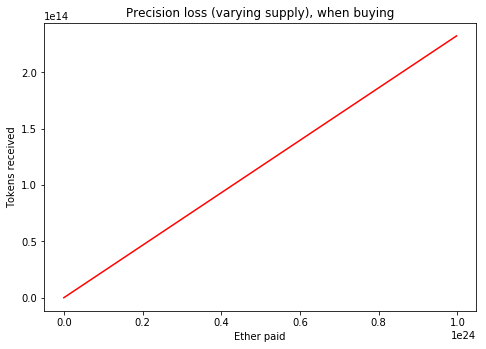

In [12]:
def calcPurchaseMin(S):
    _supply = formula.uint256(S)
    return _supply * 0x100000001/0x100000000 -_supply

def calcSaleMin(R):
    _reserveBalance = formula.uint256(R)
    return _reserveBalance * 0x100000001/0x100000000 -_reserveBalance

step = int(2000e18)# Up to 1000000 ether
x = [int(i) for i in range(0,500*step,step )]
y = [int(calcPurchaseMin(i))  for i in x]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.plot(x, y, 'r')
axes.set_xlabel('Ether paid')
axes.set_ylabel('Tokens received')
axes.set_title('Precision loss (varying supply)');
axes.set_title('Precision loss (varying supply), when buying');



1.0000122299379876e+18 9.99993730187887e+17 18499750100608.0


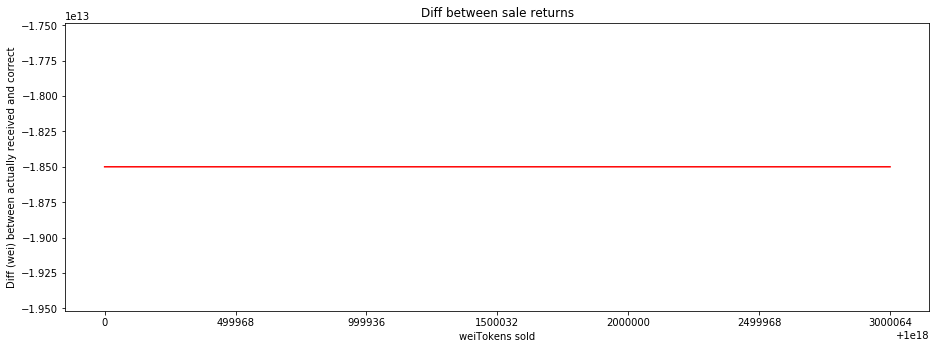

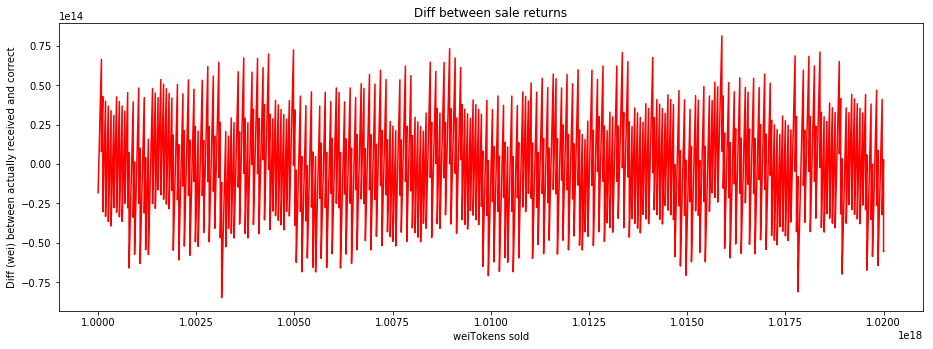

In [16]:
M = 1000000000000000000
(S,R,F,T) = (300000*M, 63000*M, 21, 1*M)
formula.verbose = False
a = formula.calculateSaleReturnSolidity(S,R,F,T)
b = formula.calculateSaleReturn(S,R,F,T)
print(a,b,a-b)

def testCornercase2(step):
    S = 300000e18
    R = 63000e18
    F = 21

    tokens = 1e18 # 99 995 476 193 726 0661
    x = []
    y = []
    for i in range(1,100000,1):
        tokens = 1e18+i*step
        try:
            
            correct_wei = formula.calculateSaleReturn(S,R,F,tokens)
            wei = formula.calculateSaleReturnSolidity(S,R,F,tokens)
        except Exception as e:
            print(S,R,F,tokens)
            print(correct_wei)
            raise e
        x.append(tokens)
        y.append(correct_wei-wei)
    
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 2, 1]) # left, bottom, width, height (range 0 to 1)
    axes.plot(x, y, 'r')
    axes.set_xlabel('weiTokens sold')
    axes.set_ylabel('Diff (wei) between actually received and correct')
    axes.set_title('Diff between sale returns');

testCornercase2(30)
#testCornercase2(20e10)
#testCornercase2(5e10)

In [17]:
testCornercase2(5e18)



3e+23 6.3e+22 21 3.0000100000000002e+23
0


Exception: Supply < Tokens

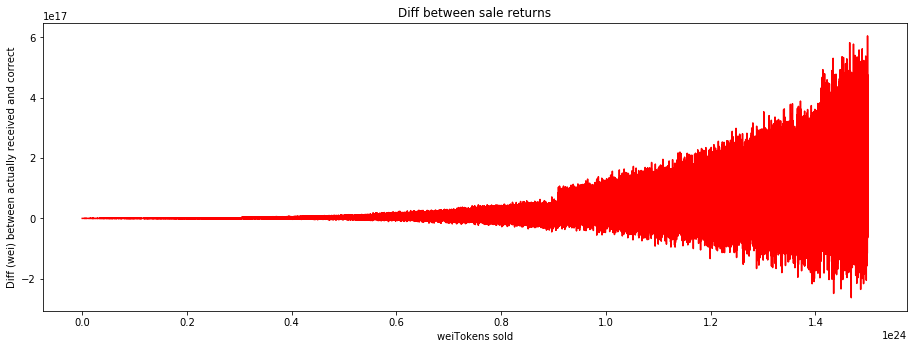

In [65]:
testCornercase2(15e18)



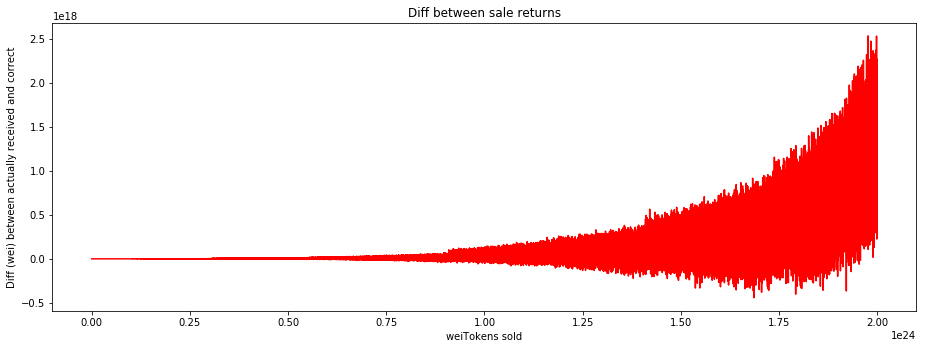

In [66]:
testCornercase2(20e18)

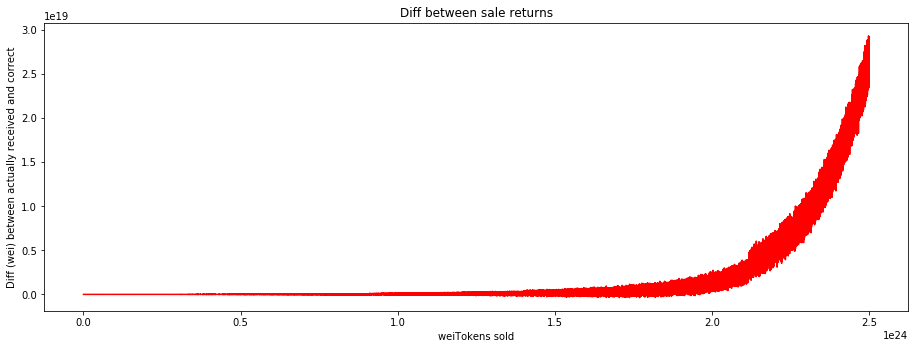

In [54]:
testCornercase2(25e18)

S,R,F = 100000000000000007629769841091887003294964970946560, 100000000000000000000, 21
Tokens          : 99989999999999997768953736724480
Returned reserve: 0
Correct returns : 0.000000
0.0
           Diff : 0


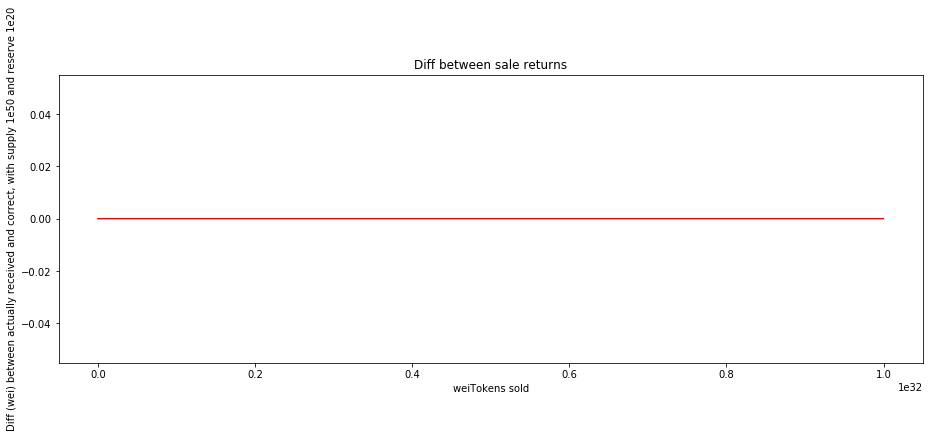

In [19]:
import analysis as formula

def calculateSaleReturn(S,R,F,T):
    return float(R) * math.pow((1.0+float(T)/float(S))  ,(100.0/F)) - float(R) 

#def calculateSaleReturn(S,R,F,T):
#    return float(R) * ( (1.0+float(T)/float(S)) ** (100.0/F) ) - float(R) )
S = 1e50
R = 1e20
F = 21
def testSkweedSupply(step):
    S = 1e50
    R = 1e20
    F = 21

    tokens = 1e18 # 99 995 476 193 726 0661
    x = []
    y = []
    lastval = (0,0,0)
    for i in range(1,10000,1):
        tokens = i*step
        try:
            wei = formula.calculateSaleReturnSolidity(S,R,F,tokens)
            correct_wei = formula.calculateSaleReturn(S,R,F,tokens)
            x.append(tokens)
            y.append(correct_wei-wei)
            lastval = (tokens, correct_wei, wei, correct_wei-wei)
        except Exception as e:
#            print(R,S,tokens)
            pass
            #raise e
    
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 2, 1]) # left, bottom, width, height (range 0 to 1)
    axes.plot(x, y, 'r')
    axes.set_xlabel('weiTokens sold')
    axes.set_ylabel('Diff (wei) between actually received and correct, with supply 1e50 and reserve 1e20')
    axes.set_title('Diff between sale returns');
    return lastval

lv = testSkweedSupply(1e28)
(tokens, correct_wei, wei, diff) = lv
print("S,R,F = %d, %d, %d" % (S,R,F))
print("Tokens          : %d" % tokens)
print("Returned reserve: %d" % wei)
print("Correct returns : %f" % correct_wei)
print(correct_wei)
print("           Diff : %d" %  (correct_wei - wei))

In [18]:
R=1e20
S=1e50
F=21
import analysis as formula2
tokens = 3e28
def calculateSaleReturn(S,R,F,T):
    return float(R) * math.pow((1.0+float(T)/float(S))  ,(100.0/F)) - float(R) 

wei = formula2.calculateSaleReturnSolidity(S,R,F,tokens)
correct_wei = calculateSaleReturn(S,R,F,tokens)

print("Returned reserve: %d" % wei)
print("Correct returns : %d" % correct_wei)
print("           Diff : %d" %  (correct_wei - wei))

Returned reserve: 0
Correct returns : 0
           Diff : 0
